# Fair Bayesian Network Implementation

In this notebook, a fair bayesian network implementation is performed.

## Imports

In [1]:
import pandas as pd
import sys
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_curve
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.5f' % x)
label_encoder = LabelEncoder()

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from forseti.datproc import translate_categorical
from forseti.bayesnet import latentLabelClassifier

C:\tools\Anaconda3\envs\forseti\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\tools\Anaconda3\envs\forseti\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Clean Data and Train Bayesian Network

In [2]:
df = pd.read_csv('data/adult.csv')
sensitives = ['gender', 'race']
label = 'income'

train = df[:30000]
test = df[30000:]

clf = latentLabelClassifier(
    train,
    sensitives,
    label,
    atol=0.01,
    classes=2
)

clf.load('trained-models/fair_model_30000.sav')

## Predict on new data

In [5]:
tmp, _ = translate_categorical(test);
y = tmp['income'];
tmp = tmp.drop('income', axis=1);

In [10]:
y_pred = clf.predict_probability(tmp)
y_pred

,fair_0,fair_1,income_0,income_1
30000,0.00000,1.00000,0.99860,0.00140
30001,0.27461,0.72539,0.72116,0.27884
30002,0.02259,0.97741,0.98767,0.01233
30003,0.67634,0.32366,0.32742,0.67258
30004,0.37295,0.62705,0.62478,0.37522
...,...,...,...,...
30095,0.14083,0.85917,0.93043,0.06957
30096,0.00000,1.00000,0.99031,0.00969
30097,0.20303,0.79697,0.79131,0.20869
30098,0.05458,0.94542,0.92652,0.07348


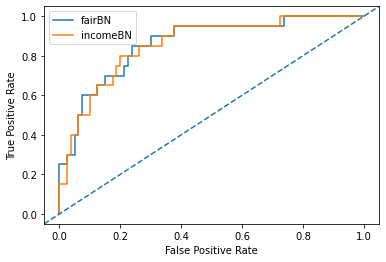

In [21]:
fpr_fair, tpr_fair, _ = roc_curve(y,  y_pred['fair_0'])
fpr_income, tpr_income, _ = roc_curve(y,  y_pred['income_1'])

#create ROC curve
plt.plot(fpr_fair, tpr_fair, label='fairBN')
plt.plot(fpr_income, tpr_income, label='incomeBN')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.axline((1, 1), slope=1, ls="--")
plt.legend()
plt.show()

In [22]:
y_pred_fair = (y_pred['fair_0'] >= 0.5).astype('int')
y_pred_income = (y_pred['income_1'] >= 0.5).astype('int')

In [24]:
f1_score(y, y_pred_fair)

0.6046511627906976

In [25]:
f1_score(y, y_pred_income)

0.5641025641025641

In [26]:
balanced_accuracy_score(y, y_pred_fair)

0.7625

In [27]:
balanced_accuracy_score(y, y_pred_income)

0.7250000000000001